# EVF-SAM Model Testing and Development
#
## This notebook allows you to quickly test the `EVFSAMSingleImageInferencer` class without having to reinitialize the model on every run.
#
# **How it works:**
## 1. **First cell:** Loads the required libraries and initializes the model. This is the slow step and only needs to be run once.
## 2. **Second cell:** Here you can provide the image URL and run the processing. You can run this cell as many times as you want with different images.

In [1]:
import matplotlib.pyplot as plt
from evfsam import EVFSAMSingleImageInferencer

# --- Model Initialization (Run this only once!) ---

# Set your model configuration here:
# - precision='fp16' or 'bf16': use if you have a compatible GPU for acceleration.
# - use_bnb=True: uses 4-bit quantization, reduces VRAM usage, but may be slightly slower/less accurate.
# - For CPU, 'fp32' is the default and most stable option.

print("Initializing model... (This may take several minutes the first time)")
inferencer = EVFSAMSingleImageInferencer(
    precision="fp16",  # or 'fp32' if you are using CPU / no fp16 support
    use_bnb=False
)
print("\n--- Model successfully initialized! --- \nYou can now run the next cell to test images.")

/Users/borosgerzson/anaconda3/envs/mannequin-segmenter-310/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Initializing model... (This may take several minutes the first time)


Some weights of the model checkpoint at YxZhang/evf-sam2-multitask were not used when initializing EvfSam2Model: ['visual_model.memory_encoder.fuser.layers.0.gamma', 'visual_model.memory_encoder.fuser.layers.1.gamma']
- This IS expected if you are initializing EvfSam2Model from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing EvfSam2Model from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of EvfSam2Model were not initialized from the model checkpoint at YxZhang/evf-sam2-multitask and are newly initialized: ['visual_model.memory_encoder.fuser.layers.0.weight', 'visual_model.memory_encoder.fuser.layers.1.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for


--- Model successfully initialized! --- 
You can now run the next cell to test images.


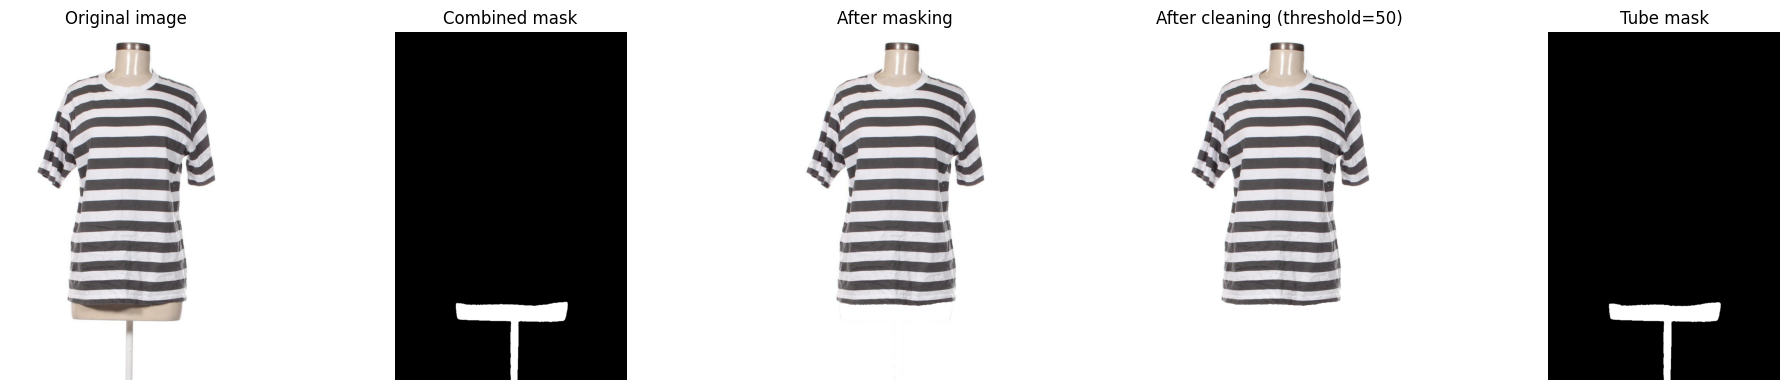


Processing successful!


In [3]:
# --- Image Processing and Testing ---

# Replace image_url with the URL of the image you want to test.
# You can run this cell as many times as you want without reinitializing the model.

# EXAMPLE IMAGE URL (replace this!)
image_url = "https://media.remix.eu/files/25-2025/Damska-teniska-Pink-Woman-132447421b.jpg"
#image_url = "https://media.remix.eu/files/26-2025/Damska-bluza-Uniqlo-132533814b.jpg"
image_url = "https://media.remix.eu/files/26-2025/Damska-bluza-Unbranded-132534370b.jpg"
image_url = "https://media.remix.eu/files/26-2025/Damska-bluza-Unbranded-132535603b.jpg"
#image_url = "https://media.remix.eu/files/25-2025/Damska-bluza-Primark-132481559c.jpg"

if "http" not in image_url:
    print("Please provide a valid image URL!")
else:
    # plot=True will display the image in the notebook
    processed_image = inferencer.process_image_url(image_url, plot=True)

    if processed_image is not None:
        print("\nProcessing successful!")
        # You can perform further operations with `processed_image` here
        # For example, save it:
        # import cv2
        # cv2.imwrite("processed_output.png", processed_image)
    else:
        print("\nProcessing failed. Check the image URL or the model output.")